In [ ]:
Rishik Reddy Bandi
3rd_Sem-B2-39
220968300

In [9]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df=pd.read_excel('Cereals1.xls')

In [ ]:
#1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer
crosstab_hc=pd.crosstab(df.type,df.mfr)
print(crosstab_hc)

In [6]:
#2. Which is the cereal with the best rating, worst rating?

print('Best Rating:')
best_rating=df[df['rating']==df['rating'].max()]
print(best_rating)

print('\n\n\n\n\n\n')

print('Worst Rating:')
worst_rating=df[df['rating']==df['rating'].min()]
print(worst_rating)

Best Rating:
                        name mfr type  calories  protein  fat  sodium  fiber  \
2  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
2    8.0       0     330        25      3     1.0   0.5  93.704912  







Worst Rating:
           name mfr type  calories  protein  fat  sodium  fiber  carbo  \
9  Cap'n'Crunch   Q    C       120        1    2     220    0.0   12.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
9      12      35        25      2     1.0  0.75  18.042851  


In [10]:
df.loc[df['rating'].idxmax()]

name        All-Bran_with_Extra_Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                            14.0
carbo                             8.0
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                            1.0
cups                              0.5
rating                      93.704912
Name: 2, dtype: object

In [12]:
df.loc[df['rating'].idxmin()]

name        Cap'n'Crunch
mfr                    Q
type                   C
calories             120
protein                1
fat                    2
sodium               220
fiber                0.0
carbo               12.0
sugars                12
potass                35
vitamins              25
shelf                  2
weight               1.0
cups                0.75
rating         18.042851
Name: 9, dtype: object

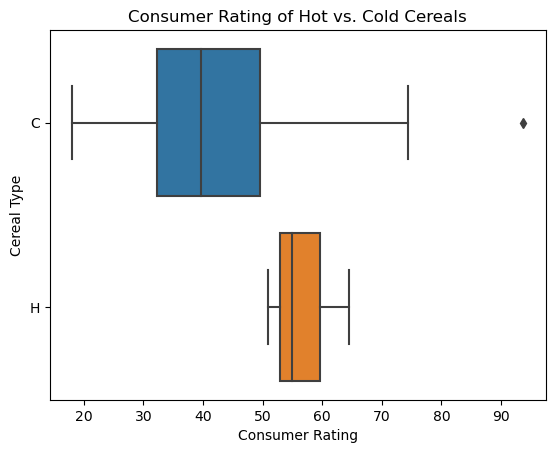

In [14]:
#3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 
sns.boxplot(x='rating',y='type',data=df)
plt.xlabel('Consumer Rating')
plt.ylabel('Cereal Type')
plt.title('Consumer Rating of Hot vs. Cold Cereals')
plt.show()

In [18]:
#4. Is there a relation between sugars, calories, carbs, and fat?

Relation=['sugars','calories', 'carbo', 'fat']
df[Relation].corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.571072,-0.349902,0.270861
calories,0.571072,1.000000,0.205913,0.510630
carbo,-0.349902,0.205913,1.000000,-0.329676
fat,0.270861,0.510630,-0.329676,1.000000


In [8]:
#5. Which manufacturers produce cereal with highest calories?
highest_calories=df[df['calories']==df['calories'].max()]
print(highest_calories)

                    name mfr type  calories  protein  fat  sodium  fiber  \
45  Mueslix_Crispy_Blend   K    C       160        3    2     150    3.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
45   17.0      13     160        25      3     1.5  0.67  30.313351  


In [15]:
df.loc[df['calories'].idxmax()]['mfr']

'K'

In [71]:
# 6.Using Chi-Square test to check if there's a relation between calories and consumer rating

data = pd.crosstab(df['calories'], df['rating'])
stat, p, dof, expected = chi2_contingency(data)
 
significance_level = 0.05
print("p value is " + str(p))
if p <= significance_level:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

p value is 0.391944138226545
There is no significant association between the variables.


<AxesSubplot:>

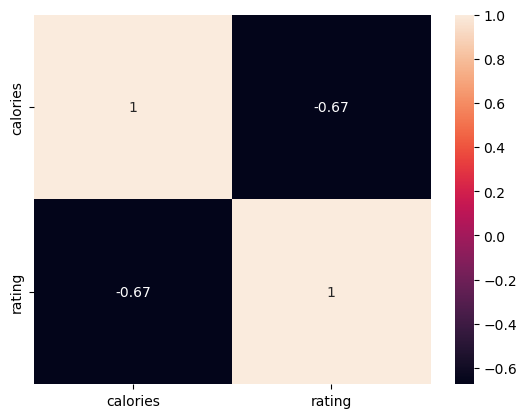

In [34]:
#6.Visulisation
sns.heatmap(df[['calories','rating']].corr(),annot=True)

In [9]:
# Normal Correlation test
Relation_calories_rating=df['calories'].corr(df['rating'])
print('Correlation between calories and rating: ',Relation_calories_rating)

Correlation between calories and rating:  -0.6743360496799723


In [57]:
#7. Using Chi-Square test to check if there is a relation between shelf and rating

data = [df['shelf'], df['rating']]
stat, p, dof, expected = chi2_contingency(data)
 
significance_level = 0.05
print("chi-square value is " + str(p))
if p <= significance_level:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

p value is 0.999915018661525
There is no significant association between the variables.


In [35]:
#7 Normal correlation test

Relation_shelf_rating=df['shelf'].corr(df['rating'])
print('Correlation between shelf and rating: ',Relation_shelf_rating)

Correlation between shelf and rating:  0.0019730207509652386


<AxesSubplot:>

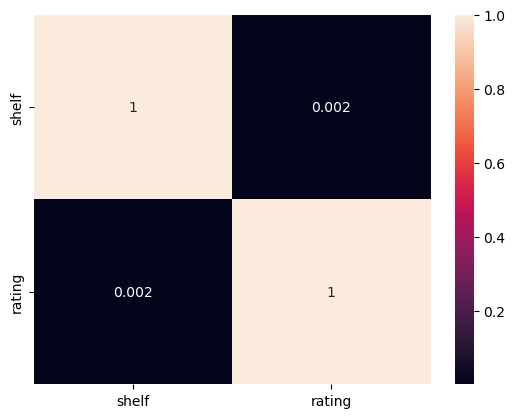

In [39]:
#7. Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated? 

sns.heatmap(df[['shelf','rating']].corr(),annot=True)

In [64]:
#8. Use Chi-Square test to check if there's a relation between manufaturer and consumer rating

data = (pd.crosstab(df['mfr'],df['rating']))
stat, p, dof, expected = chi2_contingency(data)
 
significance_level = 0.05
print("chi-square value is " + str(p))
if p <= significance_level:
    print("There is a significant relation between the attributes.")
else:
    print("There is no significant relation between the attributes.")

chi-square value is 0.4124224260799003
There is no significant relation between the attributes.


In [68]:
#9. Determine which nutrients are essential for a good rating for a cereal

#Using chi-square test

essential_nutrients = ['calories','protein', 'fat','sodium','fiber','carbo','potass','vitamins',]

for nutrient in essential_nutrients:
    data = pd.crosstab(df[nutrient],df['rating'])
    stat, p, dof, expected  = chi2_contingency(data)

    significance_level = 0.05
    if p < significance_level:
        print(f"There is a significant relation between {nutrient} and rating (chi-square_value: {p})")
    else:
        print(f"There is no significant relation between {nutrient} and rating (chi-square_value: {p})")

There is no significant relation between calories and rating (chi-square_value: 0.391944138226545)
There is no significant relation between protein and rating (chi-square_value: 0.41836092205785447)
There is no significant relation between fat and rating (chi-square_value: 0.4247447031029783)
There is no significant relation between sodium and rating (chi-square_value: 0.3382211964070985)
There is no significant relation between fiber and rating (chi-square_value: 0.3874382972354804)
There is no significant relation between carbo and rating (chi-square_value: 0.3535712577723234)
There is no significant relation between potass and rating (chi-square_value: 0.31443405619042436)
There is no significant relation between vitamins and rating (chi-square_value: 0.4390333100516997)


In [63]:
#9. Normal correlation test
essential_nutrients = ['protein', 'fat','sodium','fiber','carbo','potass','vitamins']
for nutrient in essential_nutrients:
    corr_value=df[nutrient].corr(df['rating'])
    print(f"{nutrient},{corr_value}")

protein,0.4536831680905635
fat,-0.4184389012415263
sodium,-0.40207717976320245
fiber,0.5572418136133624
carbo,0.11317283230180675
potass,0.33992463955681484
vitamins,-0.24251614776429342


In [ ]:
From above correlation we might interpret that 'Fiber','Protien','Potass','Carbo' are essential nutrients

In [ ]:
#10. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using an 80, 20 split.